In [ ]:
Agenda :
1.Importing the dataset
2.Missing value Analysis
3.Feature selection  feature -->independent variables    target-->dependent variable
       1.Chi-Square test
       2.IV-Score Analysis
       3.VIF 
4.Model fitting

# Importing the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('bank-additional-full-1.csv', sep=';')

In [ ]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.shape

(41199, 21)

In [ ]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
c=data['marital'].value_counts().tolist()
c

[24934, 11568, 4612, 80]

In [ ]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

# Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.

with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.1

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


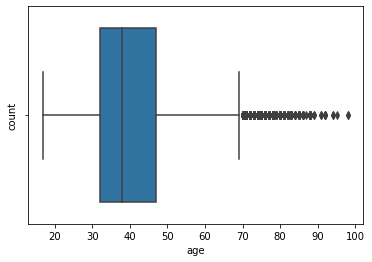

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


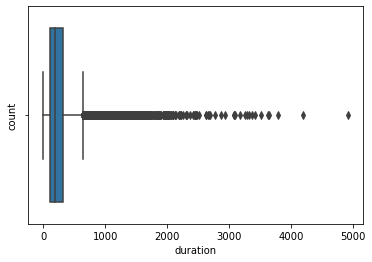

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


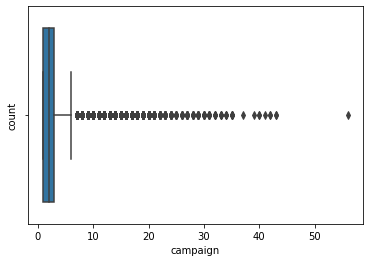

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


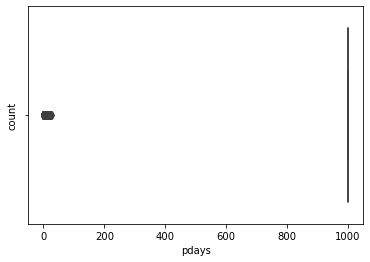

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


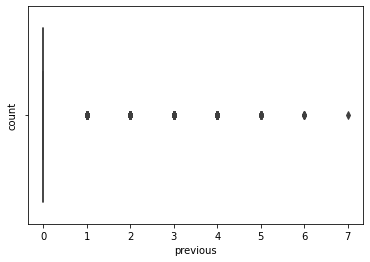

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


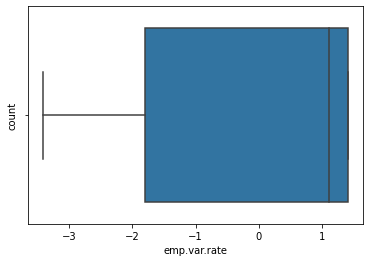

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


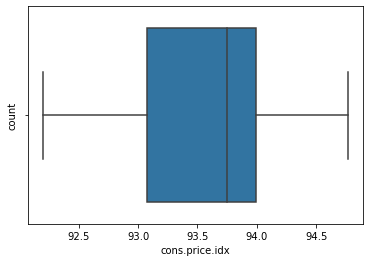

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


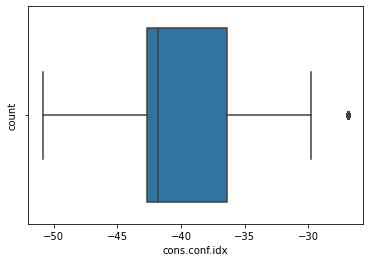

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


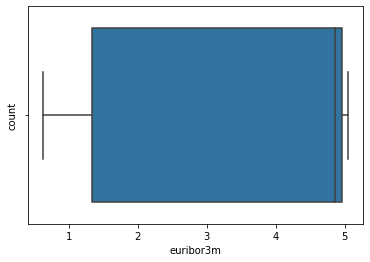

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


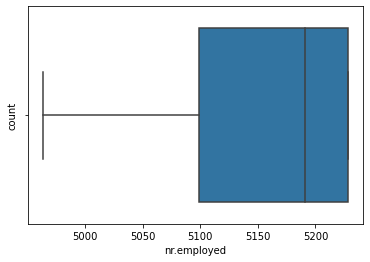

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

With reference to the above plot we can observe that some columns are having outliers .
So what actually outliers are  ,The values greater than upper limit and values lesser than lower limit .

Consider for age column
where  1st quantile /25th percentile value(Q1)  and 3rd quantile /75th percentile value(Q3)values are 
data.age.quantile(.25),data.age.quantile(.75)=(32.0, 47.0)

With the help of Q1 and Q3 we will be finding out Inter Quantile Range (IQR) for Outlier analysis

Lets start with  age column 

1.age

There are outliers

2.duration

There are outliers

3.campaign

There are outliers

4.pdays

There are no outliers

5.previous

There are no outliers

6.emp.var.rate

There are no outliers

7.cons.price.idx

There are no outliers

8.cons.conf.idx

There are  outliers

9.nr.employed

There are no outliers

so from above inference only 4 columns as outliers those are 'age','duration','campaign','cons.conf.idx' .
So in next step we'll be handling it,


# IQR method

Now with the IQR method we will be removing the outlier 


The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median


(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR
upper limit=Q3+1.5*IQR

so consider for age column

Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

(9.5 , 69.5)

so we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all 4 ('age','duration','campaign','cons.conf.idx' ) columns.

In [ ]:
#handling outliers

col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


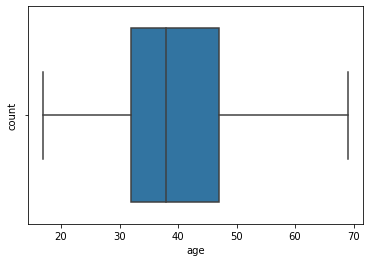

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


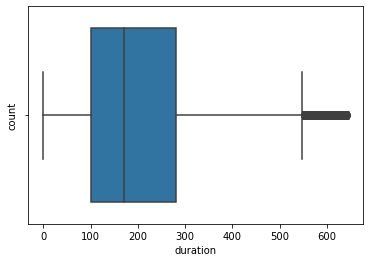

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


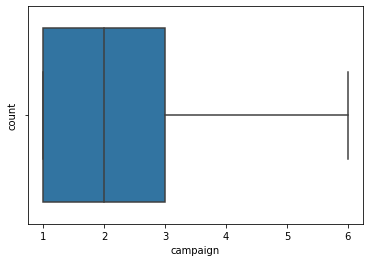

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


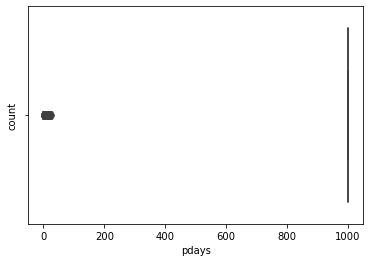

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


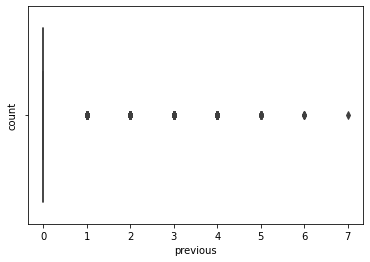

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


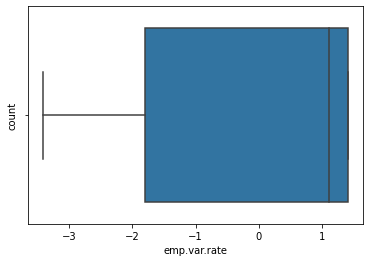

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


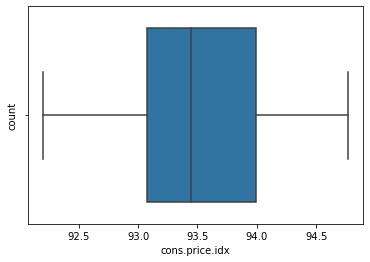

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


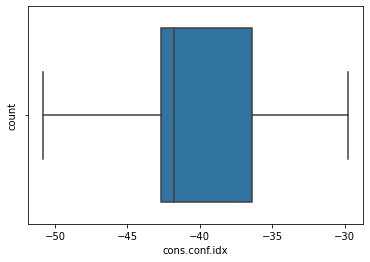

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


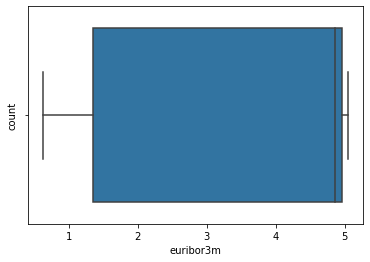

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


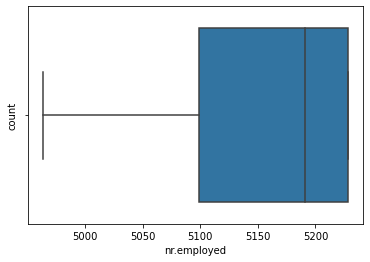

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

From the above box plot we can visualize that all the outliers have been removed .

# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [ ]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:

data['y'] = np.where(data['y'] == 'yes',1,0)


In [ ]:
data['y'] = data['y'].astype(str)

In [ ]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#taking all columns in single list
col_list = list(data.columns)

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
using for loop we are replacing all the null/na values with mean/median and mode for numerical 
and categorical values respectively

In [ ]:
Missing values can be replaced in two ways based on thier data type.

If colums are numerical we'll be replacing it by either mean /median .
        
If columns are object format or string we'll be replacing value by mode .

In [ ]:

for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
after replacing with mean/median and mode ,we can check for the null values again and check the result

In [ ]:


data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.

In [ ]:


Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.



In [ ]:

bins = [0,25,100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [ ]:
pd.cut?

In [ ]:
data['age'].value_counts()/len(data['age'])

(25, 100]    0.96003
(0, 25]      0.03997
Name: age, dtype: float64

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(25, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(25, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 100]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 100]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(25, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(25, 100]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(25, 100]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(25, 100]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(25, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.age.value_counts()

(25, 100]    33770
(0, 25]       1406
Name: age, dtype: int64

# IV analysis

In [ ]:
# IV analysis

IV analysis is done on features to check the predictive power of features(independent attributes) by binning the values and calculating the weight of eveidence and finaly computing IV-Score which gives you the predictive power based on predefined range of IV-Score. below are the range of data

#Information Value 	        Predictive power

#<0.02	                     Useless 

#0.02 to 0.1	             Weak predictors

#0.1 to 0.3	                 Medium Predictors 

#0.3 to 0.5	                 Strong predictors

#>0.5	                     Suspicious

Note:before calculating the weight of evidence make sure to bin the features if they are not categorical.and make sure each bin should have atleast 5% of data distributed in each bin



In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(25, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(25, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 100]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 100]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(25, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(25, 100]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(25, 100]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(25, 100]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(25, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
data['y'] = data['y'].astype(int)

In [ ]:
df_new=pd.DataFrame(columns=['Feature','IV-Score'])

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(25, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(25, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 100]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 100]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(25, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(25, 100]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(25, 100]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(25, 100]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(25, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
col_list = list(data.columns)
for col in col_list:
    if col == 'y': 
        continue
    elif data[col].dtype == 'object':
        df, iv = calculate_woe_iv(data, col, 'y')
        df_new=df_new.append({'Feature':col, 'IV-Score': iv}, ignore_index=True)
df_new

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,IV-Score
0,age,0.056099
1,job,0.285554
2,marital,0.068519
3,education,0.124747
4,default,0.282125
5,housing,0.003314
6,loan,0.000882
7,contact,0.387145
8,month,0.771319
9,day_of_week,0.007005


In [ ]:

You can observe that these features (age, marital,education,day_of_week) have less predictive power ,henceforth we will be  dropping those columns

In [ ]:
###Drop fields with low IV
data.drop(columns = ['age', 'marital', 'education', 'day_of_week'],inplace = True)

In [ ]:
data.columns

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.dtypes

job                object
default            object
housing            object
loan               object
contact            object
month              object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

# one hot encoding

In [ ]:
#one hot encoding
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

df_2 = pd.get_dummies(data[col_list],drop_first=True)

for col in df_2.columns:
    df_2[col] =  df_2[col].astype(int)
df_2.shape

(35176, 29)

In [ ]:
data

,job,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,no,no,no,telephone,may,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,services,unknown,no,no,telephone,may,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,no,yes,no,telephone,may,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,admin.,no,no,no,telephone,may,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,services,no,no,yes,telephone,may,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,admin.,no,yes,no,cellular,nov,281.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,unemployed,no,yes,no,cellular,nov,112.0,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,blue-collar,no,no,no,cellular,nov,383.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,retired,no,yes,no,cellular,nov,189.0,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
df_2

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41182,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
41184,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_2.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [ ]:
df_combined = pd.concat([data, df_2], axis=1)
df_combined.shape

(35176, 46)

In [ ]:
df_combined.head()

,job,default,housing,loan,contact,month,duration,campaign,pdays,previous,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,housemaid,no,no,no,telephone,may,261.0,1.0,999.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,services,unknown,no,no,telephone,may,149.0,1.0,999.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,services,no,yes,no,telephone,may,226.0,1.0,999.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,admin.,no,no,no,telephone,may,151.0,1.0,999.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,services,no,no,yes,telephone,may,307.0,1.0,999.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
col_list

['job', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
##Drop fields for which dummy vars already created
df_combined.drop(columns = col_list,axis = 1,inplace = True)

In [ ]:
df_combined.dtypes

duration                float64
campaign                float64
pdays                   float64
previous                float64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                         int32
job_blue-collar           int32
job_entrepreneur          int32
job_housemaid             int32
job_management            int32
job_retired               int32
job_self-employed         int32
job_services              int32
job_student               int32
job_technician            int32
job_unemployed            int32
job_unknown               int32
default_unknown           int32
default_yes               int32
housing_unknown           int32
housing_yes               int32
loan_unknown              int32
loan_yes                  int32
contact_telephone         int32
month_aug                 int32
month_dec                 int32
month_jul                 int32
month_ju

In [ ]:
df_combined.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,0,0,1,0
1,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,0,0,1,0
2,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,0,0,1,0
3,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,0,0,1,0
4,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,0,0,1,0


# 3.VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature           VIF
0               duration  3.258944e+00
1               campaign  3.619988e+00
2                  pdays  3.824343e+02
3               previous  6.747976e+00
4           emp.var.rate  9.566545e+01
5         cons.price.idx  7.751349e+04
6          cons.conf.idx  5.517021e+02
7              euribor3m  8.831406e+02
8            nr.employed  9.993498e+04
9        job_blue-collar  2.032355e+00
10      job_entrepreneur  1.153421e+00
11         job_housemaid  1.106610e+00
12        job_management  1.290868e+00
13           job_retired  1.133444e+00
14     job_self-employed  1.138888e+00
15          job_services  1.411319e+00
16           job_student  1.122218e+00
17        job_technician  1.660438e+00
18        job_unemployed  1.102980e+00
19           job_unknown  1.038849e+00
20       default_unknown  1.395139e+00
21           default_yes  1.001059e+00
22       housing_unknown           inf
23           housing_yes  2.191503e+00
24          loan_unknown 

In [ ]:
df_combined=df_combined.drop(['nr.employed'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

C:\Users\Admin\anaconda3\new ann\New folder (2)\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature          VIF
0               duration     3.255935
1               campaign     3.611838
2                  pdays   382.050343
3               previous     6.599663
4           emp.var.rate    35.544765
5         cons.price.idx  1169.945921
6          cons.conf.idx   269.047951
7              euribor3m   223.198820
8        job_blue-collar     2.030239
9       job_entrepreneur     1.153234
10         job_housemaid     1.106590
11        job_management     1.290867
12           job_retired     1.133319
13     job_self-employed     1.138865
14          job_services     1.411093
15           job_student     1.121427
16        job_technician     1.660387
17        job_unemployed     1.102962
18           job_unknown     1.038406
19       default_unknown     1.394707
20           default_yes     1.001059
21       housing_unknown          inf
22           housing_yes     2.191503
23          loan_unknown          inf
24              loan_yes     1.188091
25     conta

In [ ]:
df_combined=df_combined.drop(['cons.price.idx','housing_unknown','loan_unknown'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                 feature         VIF
0               duration    3.220509
1               campaign    3.606984
2                  pdays  259.963310
3               previous    5.132522
4           emp.var.rate   23.836087
5          cons.conf.idx  147.522129
6              euribor3m  146.204655
7        job_blue-collar    2.030161
8       job_entrepreneur    1.153225
9          job_housemaid    1.105856
10        job_management    1.290696
11           job_retired    1.131496
12     job_self-employed    1.138775
13          job_services    1.410878
14           job_student    1.118005
15        job_technician    1.658999
16        job_unemployed    1.102611
17           job_unknown    1.038266
18       default_unknown    1.394642
19           default_yes    1.001054
20           housing_yes    2.134717
21              loan_yes    1.183831
22     contact_telephone    4.764396
23             month_aug    5.456295
24             month_dec    1.118507
25             month_jul    4.946838
2

In [ ]:
df_combined=df_combined.drop(['pdays'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                 feature        VIF
0               duration   3.212198
1               campaign   3.604772
2               previous   5.084048
3           emp.var.rate  16.267840
4          cons.conf.idx  64.420659
5              euribor3m  97.774299
6        job_blue-collar   2.030069
7       job_entrepreneur   1.153223
8          job_housemaid   1.105644
9         job_management   1.290621
10           job_retired   1.131225
11     job_self-employed   1.138590
12          job_services   1.410532
13           job_student   1.117661
14        job_technician   1.658497
15        job_unemployed   1.102201
16           job_unknown   1.038163
17       default_unknown   1.394634
18           default_yes   1.001053
19           housing_yes   2.133896
20              loan_yes   1.183828
21     contact_telephone   4.571528
22             month_aug   4.810723
23             month_dec   1.107761
24             month_jul   4.882643
25             month_jun   3.598294
26             month_mar   1

In [ ]:
df_combined=df_combined.drop(['euribor3m'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                 feature        VIF
0               duration   3.187090
1               campaign   3.603634
2               previous   5.064499
3           emp.var.rate   2.552636
4          cons.conf.idx  39.150499
5        job_blue-collar   2.027642
6       job_entrepreneur   1.151958
7          job_housemaid   1.104403
8         job_management   1.287457
9            job_retired   1.129565
10     job_self-employed   1.136720
11          job_services   1.408644
12           job_student   1.117639
13        job_technician   1.654727
14        job_unemployed   1.101619
15           job_unknown   1.037164
16       default_unknown   1.392496
17           default_yes   1.001039
18           housing_yes   2.132113
19              loan_yes   1.183698
20     contact_telephone   3.918278
21             month_aug   3.556819
22             month_dec   1.060755
23             month_jul   4.333216
24             month_jun   3.438904
25             month_mar   1.188838
26             month_may   6

In [ ]:
df_combined=df_combined.drop(['cons.conf.idx'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                 feature        VIF
0               duration   3.110768
1               campaign   3.464730
2               previous   3.323281
3           emp.var.rate   2.316362
4        job_blue-collar   1.957668
5       job_entrepreneur   1.140489
6          job_housemaid   1.100134
7         job_management   1.271229
8            job_retired   1.126056
9      job_self-employed   1.128330
10          job_services   1.378464
11           job_student   1.117610
12        job_technician   1.608621
13        job_unemployed   1.097902
14           job_unknown   1.036381
15       default_unknown   1.388858
16           default_yes   1.000985
17           housing_yes   2.093046
18              loan_yes   1.180632
19     contact_telephone   3.858434
20             month_aug   3.511573
21             month_dec   1.060483
22             month_jul   3.882718
23             month_jun   3.065898
24             month_mar   1.174000
25             month_may   5.710770
26             month_nov   2

In [ ]:
df_combined=df_combined.drop(['poutcome_nonexistent'], axis = 1)

In [ ]:
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

              feature       VIF
0            duration  2.888461
1            campaign  3.278657
2            previous  1.767031
3        emp.var.rate  2.239366
4     job_blue-collar  1.888054
5    job_entrepreneur  1.129622
6       job_housemaid  1.093406
7      job_management  1.247115
8         job_retired  1.119571
9   job_self-employed  1.118131
10       job_services  1.347480
11        job_student  1.108819
12     job_technician  1.560320
13     job_unemployed  1.092415
14        job_unknown  1.034395
15    default_unknown  1.385348
16        default_yes  1.000984
17        housing_yes  2.040520
18           loan_yes  1.177362
19  contact_telephone  3.645653
20          month_aug  2.094661
21          month_dec  1.048838
22          month_jul  2.416694
23          month_jun  2.346724
24          month_mar  1.099422
25          month_may  4.075934
26          month_nov  1.598311
27          month_oct  1.069496
28          month_sep  1.134441
29   poutcome_success  1.450881


In [ ]:
df_combined.columns

Index(['duration', 'campaign', 'previous', 'emp.var.rate', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_success'],
      dtype='object')

# Model building

In [ ]:
Ind_Features = list(df_combined.columns)
Ind_Features.remove('y')
x = df_combined[Ind_Features]
y = df_combined['y']

In [ ]:
df_combined

,duration,campaign,previous,emp.var.rate,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
0,261.0,1.0,0.0,1.1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,149.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,226.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,151.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,307.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,281.0,1.0,0.0,-1.1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41182,112.0,1.0,1.0,-1.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
41184,383.0,1.0,0.0,-1.1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41185,189.0,2.0,0.0,-1.1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35176, dtype: int32

In [ ]:
x

,duration,campaign,previous,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
0,261.0,1.0,0.0,1.1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,149.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,226.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,151.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,307.0,1.0,0.0,1.1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,281.0,1.0,0.0,-1.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41182,112.0,1.0,1.0,-1.1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
41184,383.0,1.0,0.0,-1.1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41185,189.0,2.0,0.0,-1.1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)


In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.766910,-0.816766,-0.348112,0.842131,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,2.616253,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
1,2.019047,3.065461,-0.348112,0.842131,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,2.616253,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
2,-0.981214,-0.040320,-0.348112,0.842131,-0.545842,-0.194746,-0.15906,3.582498,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,2.616253,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
3,-0.538318,-0.040320,-0.348112,-1.242074,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
4,-0.366875,-0.816766,1.685974,-1.242074,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26377,-1.038362,-0.816766,-0.348112,-0.134840,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,5.376948,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,-0.725279,2.925525,-0.082185,-0.116789,-0.17888
26378,2.983417,-0.816766,1.685974,-1.958520,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,2.216736,-0.382226,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
26379,-0.652614,-0.816766,-0.348112,-1.242074,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,5.376948,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
26380,-0.852631,-0.816766,-0.348112,-0.134840,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,-0.725279,2.925525,-0.082185,-0.116789,-0.17888


In [ ]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.161743,-0.040320,-0.348112,0.646737,1.832032,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
1,0.990386,-0.816766,1.685974,-1.242074,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
2,-0.724049,-0.816766,-0.348112,0.646737,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
3,0.526060,0.736125,-0.348112,0.842131,-0.545842,-0.194746,-0.15906,3.582498,-0.181793,-0.185979,...,-0.422249,-0.064113,2.216736,-0.382226,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
4,-0.502601,-0.816766,1.685974,-2.023651,-0.545842,-0.194746,-0.15906,-0.279135,5.500754,-0.185979,...,-0.422249,15.597364,-0.451114,-0.382226,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,-0.945497,-0.816766,1.685974,-1.242074,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
8790,-1.424110,-0.040320,-0.348112,0.646737,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888
8791,-0.516888,0.736125,-0.348112,0.842131,-0.545842,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,2.216736,-0.382226,-0.115616,-0.725279,-0.341819,-0.082185,-0.116789,-0.17888
8792,-0.252579,-0.816766,-0.348112,-1.242074,1.832032,-0.194746,-0.15906,-0.279135,-0.181793,-0.185979,...,-0.422249,-0.064113,-0.451114,-0.382226,-0.115616,1.378780,-0.341819,-0.082185,-0.116789,-0.17888


In [ ]:
y_train

10327    0
8470     0
9035     0
31940    0
28950    0
        ..
24340    0
37053    0
35141    0
24860    0
2978     0
Name: y, Length: 26382, dtype: int32

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

# predict proba

In [ ]:
#predict proba
proba_valid = pd.DataFrame(logisticRegr.predict_proba(x_test)[:, 1])

In [ ]:
x_test

array([[ 0.16174257, -0.0403203 , -0.34811227, ..., -0.08218538,
        -0.11678905, -0.17888019],
       [ 0.99038606, -0.81676576,  1.68597367, ..., -0.08218538,
        -0.11678905, -0.17888019],
       [-0.72404874, -0.81676576, -0.34811227, ..., -0.08218538,
        -0.11678905, -0.17888019],
       ...,
       [-0.51688787,  0.73612515, -0.34811227, ..., -0.08218538,
        -0.11678905, -0.17888019],
       [-0.25257917, -0.81676576, -0.34811227, ..., -0.08218538,
        -0.11678905, -0.17888019],
       [-0.33830091,  0.73612515, -0.34811227, ..., -0.08218538,
        -0.11678905, -0.17888019]])

In [ ]:
logisticRegr.predict_proba(x_test)

array([[9.97012415e-01, 2.98758462e-03],
       [8.75292209e-01, 1.24707791e-01],
       [9.99083287e-01, 9.16713212e-04],
       ...,
       [9.90563076e-01, 9.43692431e-03],
       [9.77251234e-01, 2.27487659e-02],
       [9.98707729e-01, 1.29227096e-03]])

In [ ]:
proba_valid

,0
0,0.002988
1,0.124708
2,0.000917
3,0.023557
4,0.199548
...,...
8789,0.009960
8790,0.000977
8791,0.009437
8792,0.022749


In [ ]:
df_new=pd.DataFrame({'Predictions':test_pred})

In [ ]:
df_new

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
8789,0
8790,0
8791,0
8792,0


In [ ]:
df_new.insert(1, "Y_predict_proba", proba_valid)

In [ ]:
df_new

,Predictions,Y_predict_proba
0,0,0.002988
1,0,0.124708
2,0,0.000917
3,0,0.023557
4,0,0.199548
...,...,...
8789,0,0.009960
8790,0,0.000977
8791,0,0.009437
8792,0,0.022749


In [ ]:
df_new['Y_pred_0.1']=np.where((df_new['Y_predict_proba']>0.1), 1,0)

In [ ]:
df_new

,Predictions,Y_predict_proba,Y_pred_0.1
0,0,0.002988,0
1,0,0.124708,1
2,0,0.000917,0
3,0,0.023557,0
4,0,0.199548,1
...,...,...,...
8789,0,0.009960,0
8790,0,0.000977,0
8791,0,0.009437,0
8792,0,0.022749,0


In [ ]:
df_new['Y_pred_0.2']=np.where(df_new['Y_predict_proba']>0.2,1,0)
df_new['Y_pred_0.3']=np.where(df_new['Y_predict_proba']>0.3, 1,0)
df_new['Y_pred_0.4']=np.where(df_new['Y_predict_proba']>0.4, 1,0)
df_new['Y_pred_0.5']=np.where(df_new['Y_predict_proba']>0.5, 1,0)
df_new['Y_pred_0.6']=np.where(df_new['Y_predict_proba']>0.6, 1,0)
df_new['Y_pred_0.7']=np.where(df_new['Y_predict_proba']>0.7, 1,0)
df_new['Y_pred_0.8']=np.where(df_new['Y_predict_proba']>0.8, 1,0)
df_new['Y_pred_0.9']=np.where(df_new['Y_predict_proba']>0.9, 1,0)

In [ ]:
df_new

,Predictions,Y_predict_proba,Y_pred_0.1,Y_pred_0.2,Y_pred_0.3,Y_pred_0.4,Y_pred_0.5,Y_pred_0.6,Y_pred_0.7,Y_pred_0.8,Y_pred_0.9
0,0,0.002988,0,0,0,0,0,0,0,0,0
1,0,0.124708,1,0,0,0,0,0,0,0,0
2,0,0.000917,0,0,0,0,0,0,0,0,0
3,0,0.023557,0,0,0,0,0,0,0,0,0
4,0,0.199548,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8789,0,0.009960,0,0,0,0,0,0,0,0,0
8790,0,0.000977,0,0,0,0,0,0,0,0,0
8791,0,0.009437,0,0,0,0,0,0,0,0,0
8792,0,0.022749,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])

In [ ]:
c1

array([[8393,    0],
       [   0,  401]], dtype=int64)

In [ ]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

1.0

In [ ]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

1.0

In [ ]:
d11=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])

In [ ]:
d11=d11.append({'cutoff':0.2, 'Sensitivity': sen,'Specificity':sep}, ignore_index=True)

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.1'])
c2=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.2'])
c3=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.3'])
c4=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.4'])
c5=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])
c6=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.6'])
c7=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.7'])
c8=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.8'])
c9=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.9'])

In [ ]:
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [ ]:
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [ ]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])

In [ ]:
d_cutoff_value

,cutoff,Sensitivity,Specificity


In [ ]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1, 'Sensitivity': sen1,'Specificity':sep1}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2, 'Sensitivity': sen2,'Specificity':sep2}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3, 'Sensitivity': sen3,'Specificity':sep3}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4, 'Sensitivity': sen4,'Specificity':sep4}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5, 'Sensitivity': sen5,'Specificity':sep5}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6, 'Sensitivity': sen6,'Specificity':sep6}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7, 'Sensitivity': sen7,'Specificity':sep7}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8, 'Sensitivity': sen8,'Specificity':sep8}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9, 'Sensitivity': sen9,'Specificity':sep9}, ignore_index=True)
d_cutoff_value

,cutoff,Sensitivity,Specificity
0,0.1,0.861075,1.000000
1,0.2,0.931252,1.000000
2,0.3,0.962826,1.000000
3,0.4,0.983677,1.000000
4,0.5,1.000000,1.000000
5,0.6,1.000000,0.693267
6,0.7,1.000000,0.516209
7,0.8,1.000000,0.329177
8,0.9,1.000000,0.152120


In [ ]:
for i in range(9):
    
    d_cutoff_value.loc[i,'Total_val']=d_cutoff_value.loc[i,'Sensitivity']+d_cutoff_value.loc[i,'Specificity']

In [ ]:
d_cutoff_value


,cutoff,Sensitivity,Specificity,Total_val
0,0.1,0.861075,1.000000,1.861075
1,0.2,0.931252,1.000000,1.931252
2,0.3,0.962826,1.000000,1.962826
3,0.4,0.983677,1.000000,1.983677
4,0.5,1.000000,1.000000,2.000000
5,0.6,1.000000,0.693267,1.693267
6,0.7,1.000000,0.516209,1.516209
7,0.8,1.000000,0.329177,1.329177
8,0.9,1.000000,0.152120,1.152120


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
test_pred_prob=logisticRegr.predict_proba(x_test)

# roc curve and auc

Logistic: ROC AUC=0.938


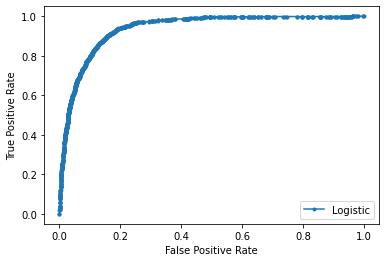

In [ ]:
# roc curve and auc
#Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores->how much data has been understood by the model
auc = roc_auc_score(np.array(y_test), test_pred_prob[:, 1])

# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves

fpr, tpr, threshold = roc_curve(np.array(y_test), test_pred_prob[:, 1])
# plot the roc curve for the model

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()